In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Revenue KPI


### Revenue base values


In [2]:
# costs are listed without tax, since we dont get the tax anyway
# assumes only "normal" bikes are used, not e-bikes
# assumes cost per min for walkup is also 0.15(not explicitly stated on website, might not be possible anymore)
# indegoFlex is also not listed and will be treated as walk up
dayFreeTime = 30
dayCost = 12
indego30FreeTime = 60
indego30Cost = 17
indego365FreeTime = 60
indego365Cost = 156
costPerMin = 0.15
walkUpFreeTime = 0


### Data preperation


In [3]:
data = pd.read_csv("csvs/p.csv", index_col=0)
data.index = range(len(data))
data


start_time             end_time  start_station_id  \
0       2018-01-01 00:24:00  2018-01-01 00:42:00              3124   
1       2018-01-01 00:38:00  2018-01-01 10:10:00              3023   
2       2018-01-01 00:48:00  2018-01-01 01:10:00              3026   
3       2018-01-01 01:03:00  2018-01-01 01:24:00              3045   
4       2018-01-01 01:05:00  2018-01-01 01:09:00              3115   
...                     ...                  ...               ...   
668586  2018-12-31 23:18:00  2019-01-01 00:04:00              3037   
668587  2018-12-31 23:25:00  2019-01-01 00:06:00              3168   
668588  2018-12-31 23:26:00  2019-01-01 06:44:00              3026   
668589  2018-12-31 23:33:00  2018-12-31 23:47:00              3063   
668590  2018-12-31 23:39:00  2018-12-31 23:49:00              3007   

        end_station_id  bike_id  user_type              start_station_name  \
0                 3073     3708   Indego30                Race Street Pier   
1                 3066     3288  Indego365              Rittenhouse Square   
2                 3023    11735   Indego30                     2nd & South   
3                 3037     5202   Indego30                   13th & Locust   
4                 3058     5142   Indego30             19th & Girard, PTTI   
...                ...      ...        ...                             ...   
668586            3037    14519   Day Pass  Pennsylvania Convention Center   
668587            3168    11891   Indego30                   20th & Sansom   
668588            3026     5410   Indego30                     2nd & South   
668589            3150     2701   Day Pass                     17th & Pine   
668590            3049     3471   Indego30          11th & Pine, Kahn Park   

                             end_station_name  
0                         9th & Spring Garden  
1                              19th & Lombard  
2                          Rittenhouse Square  
3              Pennsylvania Convention Center  
4                            20th & Fairmount  
...                                       ...  
668586         Pennsylvania Convention Center  
668587                          20th & Sansom  
668588                            2nd & South  
668589  15th & Castle, DiSilvestro Playground  
668590                        Foglietta Plaza  

[668591 rows x 8 columns]

In [4]:
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])


In [5]:
delta = pd.DataFrame(
    {'timedelta': data["end_time"]-data["start_time"]})
delta


timedelta
0      0 days 00:18:00
1      0 days 09:32:00
2      0 days 00:22:00
3      0 days 00:21:00
4      0 days 00:04:00
...                ...
668586 0 days 00:46:00
668587 0 days 00:41:00
668588 0 days 07:18:00
668589 0 days 00:14:00
668590 0 days 00:10:00

[668591 rows x 1 columns]

In [6]:
tripLen = delta["timedelta"].dt.components[["days", "hours", "minutes"]]
tripLenDf = pd.DataFrame(
    {'trip_len_in_min': tripLen["days"]*24*60+tripLen["hours"]*60+tripLen["minutes"]})
tripLenDf


trip_len_in_min
0                    18
1                   572
2                    22
3                    21
4                     4
...                 ...
668586               46
668587               41
668588              438
668589               14
668590               10

[668591 rows x 1 columns]

In [7]:
data = data.join(tripLenDf, how="outer")
data


start_time            end_time  start_station_id  \
0      2018-01-01 00:24:00 2018-01-01 00:42:00              3124   
1      2018-01-01 00:38:00 2018-01-01 10:10:00              3023   
2      2018-01-01 00:48:00 2018-01-01 01:10:00              3026   
3      2018-01-01 01:03:00 2018-01-01 01:24:00              3045   
4      2018-01-01 01:05:00 2018-01-01 01:09:00              3115   
...                    ...                 ...               ...   
668586 2018-12-31 23:18:00 2019-01-01 00:04:00              3037   
668587 2018-12-31 23:25:00 2019-01-01 00:06:00              3168   
668588 2018-12-31 23:26:00 2019-01-01 06:44:00              3026   
668589 2018-12-31 23:33:00 2018-12-31 23:47:00              3063   
668590 2018-12-31 23:39:00 2018-12-31 23:49:00              3007   

        end_station_id  bike_id  user_type              start_station_name  \
0                 3073     3708   Indego30                Race Street Pier   
1                 3066     3288  Indego365              Rittenhouse Square   
2                 3023    11735   Indego30                     2nd & South   
3                 3037     5202   Indego30                   13th & Locust   
4                 3058     5142   Indego30             19th & Girard, PTTI   
...                ...      ...        ...                             ...   
668586            3037    14519   Day Pass  Pennsylvania Convention Center   
668587            3168    11891   Indego30                   20th & Sansom   
668588            3026     5410   Indego30                     2nd & South   
668589            3150     2701   Day Pass                     17th & Pine   
668590            3049     3471   Indego30          11th & Pine, Kahn Park   

                             end_station_name  trip_len_in_min  
0                         9th & Spring Garden               18  
1                              19th & Lombard              572  
2                          Rittenhouse Square               22  
3              Pennsylvania Convention Center               21  
4                            20th & Fairmount                4  
...                                       ...              ...  
668586         Pennsylvania Convention Center               46  
668587                          20th & Sansom               41  
668588                            2nd & South              438  
668589  15th & Castle, DiSilvestro Playground               14  
668590                        Foglietta Plaza               10  

[668591 rows x 9 columns]

In [8]:
data = data.drop(["end_time", "start_station_id", "end_station_id",
                  "bike_id", "start_station_name", "end_station_name"], axis=1)
data


start_time  user_type  trip_len_in_min
0      2018-01-01 00:24:00   Indego30               18
1      2018-01-01 00:38:00  Indego365              572
2      2018-01-01 00:48:00   Indego30               22
3      2018-01-01 01:03:00   Indego30               21
4      2018-01-01 01:05:00   Indego30                4
...                    ...        ...              ...
668586 2018-12-31 23:18:00   Day Pass               46
668587 2018-12-31 23:25:00   Indego30               41
668588 2018-12-31 23:26:00   Indego30              438
668589 2018-12-31 23:33:00   Day Pass               14
668590 2018-12-31 23:39:00   Indego30               10

[668591 rows x 3 columns]

In [9]:
groupedData = data.groupby("user_type").describe()
groupedData


trip_len_in_min                                                 \
                       count       mean         std   min   25%   50%   75%   
user_type                                                                     
Day Pass             80064.0  45.064536  146.159015 -51.0  13.0  21.0  34.0   
Indego30            478288.0  17.954529   65.469410 -48.0   7.0  11.0  16.0   
Indego365            94344.0  15.039155   55.069915 -54.0   7.0  10.0  14.0   
IndegoFlex            3851.0  27.963905   91.715084   1.0   9.0  14.0  22.0   
One Day Pass           431.0  53.208817  229.717770   1.0  14.0  21.0  29.0   
Walk-up              11613.0  40.685611  105.419980   1.0  12.0  20.0  36.0   

                      
                 max  
user_type             
Day Pass      6400.0  
Indego30      7551.0  
Indego365     5769.0  
IndegoFlex    4000.0  
One Day Pass  3348.0  
Walk-up       2323.0

In [10]:
data["month"] = data['start_time'].dt.month


# Revenue Calculation


## Assumptions on driving behavior

-indego30 users take 20 trips a month. This is based on the assumption that they use it mostly on sunny working days(twice) and not on raining days

-indego365 users take 15 trips a month. Same assumption as above, but average is reduced, because they will be less likely to ride in the winter

-day pass users take 3 trips, because otherwise it would be cheaper to pay the walk up price and more than 3 trips on average seem unlikely


### Indego365


In [11]:
indego365MonthlyTrips = 15

data365 = data[data["user_type"] == "Indego365"]

monthlyRevenueIndego365 = []

# select data of this month where the "free" time limit was crossed
extraPayData365 = data365[data365["trip_len_in_min"] > indego365FreeTime]

# for each month calculate cost payed for overtime and add average cost of subscription
for x in range(1, 13):
    # calculate money spent on time over the "free" limit
    dataMonth = extraPayData365[extraPayData365["month"] == x]
    extraTime365 = (dataMonth["trip_len_in_min"]-indego30FreeTime).sum()
    extraPay365 = extraTime365*costPerMin
    # calculate pass revenue
    monthlyRevenueIndego365.append(extraPay365+round(
        data365["trip_len_in_min"].count()/(indego365MonthlyTrips*12)) * indego365Cost/12)


yearlyRevenueIndego365 = sum(monthlyRevenueIndego365)
print(
    f"Indego365 approximately earns a yearly revenue of {yearlyRevenueIndego365}$ per year")


Indego365 approximately earns a yearly revenue of 123172.5$ per year


### Indego30


In [12]:
indego30MonthlyTrips = 20

data30 = data[data["user_type"] == "Indego30"]

monthlyRevenueIndego30 = []

# select data of this month where the "free" time limit was crossed
extraPayData30 = data30[data30["trip_len_in_min"] > indego30FreeTime]

# for each month calculate cost payed for overtime and add cost of subscriptions this month
for x in range(1, 13):
    # calculate money spent on time over the "free" limit
    dataMonth = extraPayData30[extraPayData30["month"] == x]
    extraTime30 = (dataMonth["trip_len_in_min"]-indego30FreeTime).sum()
    extraPay30 = extraTime30*costPerMin
    # calculate pass revenue
    monthSubRevenue = round(data30[data30["month"] == x]["trip_len_in_min"].count(
    )/indego30MonthlyTrips)*indego30Cost
    monthlyRevenueIndego30.append(extraPay30+monthSubRevenue)

yearlyRevenueIndego30 = sum(monthlyRevenueIndego30)
print(
    f"Indego30 approximately earns a yearly revenue of {yearlyRevenueIndego30}$ per year")


Indego30 approximately earns a yearly revenue of 679167.6$ per year


### (One) Day Pass


Day Pass and One Day Pass will be looked at as the same subscription type, since Day Pass seems to have replaced One Day Pass starting april.


In [13]:
data["day"] = data["start_time"].dt.dayofyear
data = data.drop(["start_time"], axis=1)
data


user_type  trip_len_in_min  month  day
0        Indego30               18      1    1
1       Indego365              572      1    1
2        Indego30               22      1    1
3        Indego30               21      1    1
4        Indego30                4      1    1
...           ...              ...    ...  ...
668586   Day Pass               46     12  365
668587   Indego30               41     12  365
668588   Indego30              438     12  365
668589   Day Pass               14     12  365
668590   Indego30               10     12  365

[668591 rows x 4 columns]

In [14]:
DayPassDailyTrips = 3

dataDay = data[data["user_type"].isin(["Day Pass", "One Day Pass"])]

dailyRevenueDayPass = pd.DataFrame(columns=["daily_revenue", "month"])

# select data of this month where the "free" time limit was crossed
extraPayDataDay = dataDay[dataDay["trip_len_in_min"] > dayFreeTime]

# for each day calculate cost payed for overtime and add cost of subscriptions
for x in range(1, 366):
    # calculate money spent on time over the "free" limit
    dataToday = extraPayDataDay[extraPayDataDay["day"] == x]
    extraTimeDay = (dataToday["trip_len_in_min"]-dayFreeTime).sum()
    extraPayDay = extraTimeDay*costPerMin
    # calculate pass revenue
    subPayDay = round(dataDay[dataDay["day"] == x]
                      ["trip_len_in_min"].count()/DayPassDailyTrips) * dayCost
    # save cost to DF
    if extraPayDay+subPayDay > 0:
        dailyRevenueDayPass.loc[x] = [
            extraPayDay + subPayDay, dataDay[dataDay["day"] == x].iloc[0]["month"]]


# convert daily revenue to monthly revenue for visualization
groupMonth = dailyRevenueDayPass.groupby("month").describe()
monthlyRevenueDayPass = groupMonth["daily_revenue"]["count"] * \
    groupMonth["daily_revenue"]["mean"]

yearlyRevenueDayPass = sum(monthlyRevenueDayPass)
print(
    f"Day Pass approximately earns a yearly revenue of {round(yearlyRevenueDayPass, 2)}$ per year")


Day Pass approximately earns a yearly revenue of 621131.55$ per year


### Walk-up (and IndegoFlex)


In [15]:
monthlyRevenueWalkUp = []

dataWalkup = data[data["user_type"].isin(["Walk-up", "IndegoFlex"])]


for x in range(1, 13):
    dataMonth = dataWalkup[dataWalkup["month"] == x]
    monthlyRevenueWalkUp.append(dataMonth["trip_len_in_min"].sum()*costPerMin)

yearlyRevenueWalkUp = sum(monthlyRevenueWalkUp)

print(
    f"Walk-up approximately earns a yearly revenue of {round(yearlyRevenueWalkUp, 2)}$ per year")


Walk-up approximately earns a yearly revenue of 87025.65$ per year


## Visualization


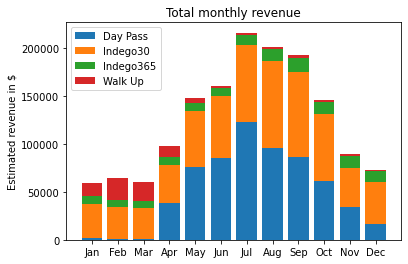

In [16]:
# create arrays to make code more readable
A = np.array(monthlyRevenueDayPass)
B = np.array(monthlyRevenueIndego30)
C = np.array(monthlyRevenueIndego365)
D = np.array(monthlyRevenueWalkUp)

labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


fig, ax = plt.subplots()

ax.bar(labels, A, label='Day Pass')
ax.bar(labels, B, label='Indego30', bottom=A)
ax.bar(labels, C, label='Indego365', bottom=A+B)
ax.bar(labels, D, label='Walk Up', bottom=A+B+C)
plt.title("Total monthly revenue")
ax.set_ylabel('Estimated revenue in $')
ax.legend()
plt.show()
